https://radimrehurek.com/gensim/models/word2vec.html

In [1]:
import pandas as pd
import numpy as np
import os

from gensim.models import Word2Vec
import matplotlib.pyplot as plt
%matplotlib inline
from gensim.scripts.glove2word2vec import glove2word2vec
import tempfile

In [2]:
file_dataframe = "../data/recommender_resumes_clean_text_for_train.pkl"

df = pd.read_pickle(file_dataframe)
df.head(300)

,_id,text,class,raw_text
0,bf8217e0-4fe8-44e1-8446-637ce8f8fb93,international business development manager sum...,estandar\BUSINESS-DEVELOPMENT,INTERNATIONAL BUSINESS DEVELOPMENT MANAGER\nSu...
1,09d9e88a-3b77-4d38-abd9-ce1e4b76d237,hr generalist experience current hr generalist...,estandar\HR,HR GENERALIST\nExperience\n08/2017 to Current\...
2,dff61afa-9949-4d15-9dd9-3251c9836e7c,accountant highlight microsoft office intermed...,estandar\ACCOUNTANT,ACCOUNTANT\nHighlights\nMicrosoft Office : Int...
3,2c9ab807-c1e2-49f0-a4fd-f3780d907470,accountant skill quickbooks sage lacerte intui...,estandar\ACCOUNTANT,"ACCOUNTANT\nSkills\nQuickBooks, Sage, Lacerte,..."
4,782e5b2c-c995-4cc4-a25b-6393b886a4f0,none,estandar\BUSINESS-DEVELOPMENT,None
...,...,...,...,...
295,c3490588-947d-4715-be3e-157925cc0900,mortgage banking executive analyst summary foc...,estandar\BANKING,MORTGAGE BANKING EXECUTIVE ANALYST\nSummary\n\...
296,945b04ec-cbec-4195-88ca-01d5d727a484,mechanical engineer summary year month experie...,estandar\AVIATION,MECHANICAL ENGINEER\nSummary\n\n5 years and 9 ...
297,aef917ca-10df-4881-9ce1-05f60d06f52e,finance business partner summary strategic ana...,estandar\FINANCE,FINANCE BUSINESS PARTNER\nSummary\nStrategic a...
298,976e74ef-4408-4dcd-806a-05d8ecf1163a,it technology specialist professional summary ...,estandar\INFORMATION-TECHNOLOGY,IT TECHNOLOGY SPECIALIST\nProfessional Summary...


In [3]:
df_train = df[: round(len(df) * 1.0)]
df_test = df[: round(len(df) * 0.2)]

# Guardar el dataframe con el texto preprocesado

file_dataframe_train = "../data/recommender_resumes_train.pkl"

# Remove a file
if os.path.exists(file_dataframe_train):
    os.remove(file_dataframe_train)

df.to_pickle(file_dataframe_train)

file_dataframe_test = "../data/recommender_resumes_test.pkl"

# Remove a file
if os.path.exists(file_dataframe_test):
    os.remove(file_dataframe_test)

df.to_pickle(file_dataframe_test)

In [4]:
df = df_train

In [5]:
# Crear Corpus

i = 0
corpus = []
for words in df['text']:
    corpus.append(words.split())

In [6]:
EMBEDDING_FILE = '../data/GoogleNews-vectors-negative300.bin'

GLOVE_FILE = '../data/glove.840B.300d.txt'

GLOVE_WORD2VEC = '../data/glove_word2vec.bin'

In [7]:
from os.path import exists
#new_file, word2vec_file = tempfile.mkstemp()
if not exists(GLOVE_WORD2VEC):
    glove2word2vec(GLOVE_FILE, GLOVE_WORD2VEC)

#EMBEDDING_FILE = word2vec_file

In [8]:
# Training our corpus with Google Pretrained Model
google_model = Word2Vec(vector_size  = 300, window=9, min_count = 1, workers = 20, sg=1)

google_model.build_vocab(corpus)

google_model.wv.vectors_lockf = np.ones(len(google_model.wv), dtype= np.float64)

google_model.wv.intersect_word2vec_format(EMBEDDING_FILE, lockf=1.0, binary=True)

#google_model.wv.intersect_word2vec_format(GLOVE_WORD2VEC, lockf=1.0, binary=False)

google_model.train(corpus, total_examples=google_model.corpus_count, epochs = 100)

(138213905, 146545300)

In [9]:
google_model.save("../data/model_word2vec.bin")

In [10]:
# extract all vectors
X = google_model.wv[google_model.wv.key_to_index]

X.shape

(45101, 300)

In [11]:
import umap

cluster_embedding = umap.UMAP(n_neighbors=30, min_dist=0.0,
                              n_components=2, random_state=42).fit_transform(X)


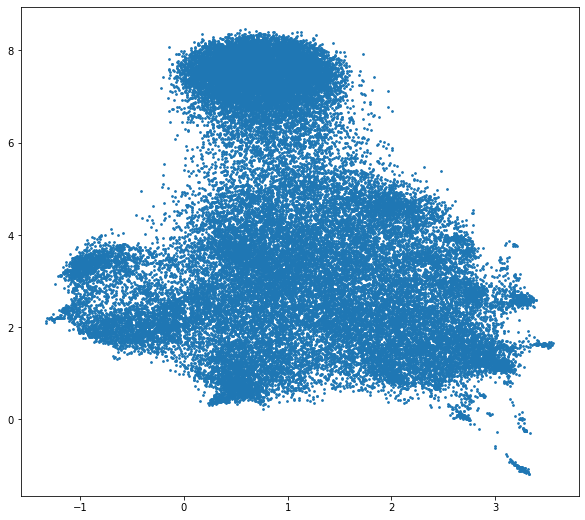

In [12]:
plt.figure(figsize=(10,9))
plt.scatter(cluster_embedding[:, 0], cluster_embedding[:, 1], s=3, cmap='Spectral')